# Test Covid19 classifier

      Connect google drive

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


      Import trained model

---



In [19]:
import tensorflow as tf
classifier = tf.keras.models.load_model('/content/drive/MyDrive/datasets/covid19/covid1.h5')

    Predict Covid -19 positive or negative using classifier

---



In [41]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from skimage import util
from skimage import data, io, img_as_ubyte
import matplotlib.pyplot as plt



    
def getRandomImage(path, img_width, img_height):
    file_names=[f for f in listdir(path) if isfile(join(path,f))]
    random_file_index = np.random.randint(0, len(file_names))
    image_name = file_names[random_file_index]
    final_path = path+'/'+image_name
    src = '/content/drive/MyDrive/datasets/covid19/manipulation/'+image_name
    img = io.imread(final_path)
    inverted_img = util.invert(img)
    plt.imsave(src, inverted_img)
    img = image.load_img(src, target_size=(img_width, img_height))
    return img, final_path,image_name,src


img_width, img_height =400,400

original_path=[]
predictions=[]
image_names = []
result_src = []
for i in range(0,5):
    path ='/content/drive/MyDrive/datasets/covid19/test2/'
    img, final_path,image_name,src = getRandomImage(path,img_width, img_height )
    original_path.append(final_path)
    x= image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_pred= classifier.predict(images)
    classes = np.argmax(y_pred, axis=1)[0]
    predictions.append(classes)
    image_names.append(image_name)
    result_src.append(src)
    
print(predictions)
print(image_names)
print(result_src)
print(original_path)




[0, 1, 1, 0, 0]
['covid1.jpeg', 'normal1.jpeg', 'normal1.jpeg', 'covid1.jpeg', 'covid1.jpeg']
['/content/drive/MyDrive/datasets/covid19/manipulation/covid1.jpeg', '/content/drive/MyDrive/datasets/covid19/manipulation/normal1.jpeg', '/content/drive/MyDrive/datasets/covid19/manipulation/normal1.jpeg', '/content/drive/MyDrive/datasets/covid19/manipulation/covid1.jpeg', '/content/drive/MyDrive/datasets/covid19/manipulation/covid1.jpeg']
['/content/drive/MyDrive/datasets/covid19/test2//covid1.jpeg', '/content/drive/MyDrive/datasets/covid19/test2//normal1.jpeg', '/content/drive/MyDrive/datasets/covid19/test2//normal1.jpeg', '/content/drive/MyDrive/datasets/covid19/test2//covid1.jpeg', '/content/drive/MyDrive/datasets/covid19/test2//covid1.jpeg']


Original image and Color manipulated image and predicted result show in a plot(matplotlib)

---



---



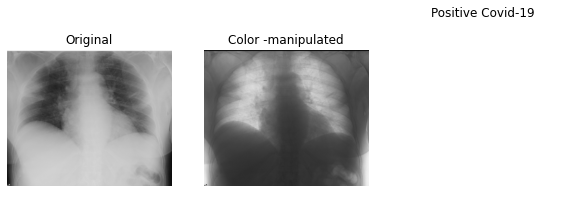

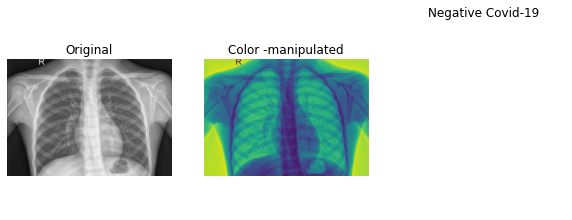

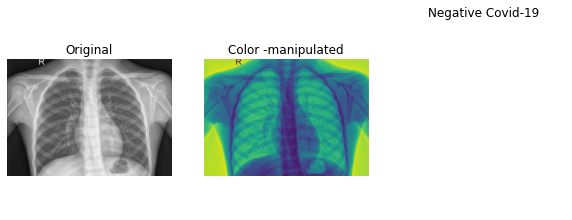

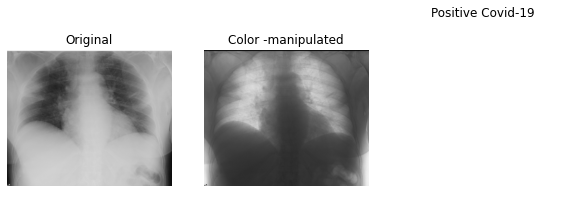

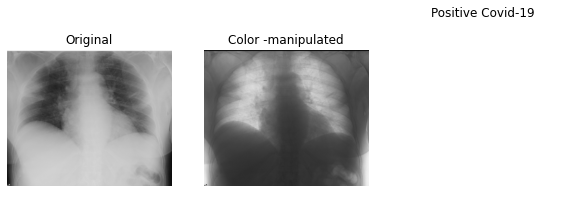

In [42]:
for i in range(0,5):
  original_img = io.imread(original_path[i])
  colored_img = io.imread(result_src[i])
  if predictions[i] == 0:
    result = 'Positive Covid-19'
  else:
    result = 'Negative Covid-19'

  #Let us look at the input image, thresholds on thehistogram and final segmented image
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

  # Plotting the original image.
  ax[0].imshow(original_img, cmap='gray')
  ax[0].set_title('Original')
  ax[0].axis('off')

  # Plotting the histogram and the two thresholds obtained from


  # Plotting the Multi Otsu result.
  ax[1].imshow(colored_img)
  ax[1].set_title('Color -manipulated')
  ax[1].axis('off')

  # ax[2].imshow(colored_img, cmap='rgb')
  ax[2].set_title(result)
  ax[2].axis('off')

  plt.subplots_adjust()

  plt.show()